# Huntington analysis
_Saja_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [15]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [16]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


# Loading Data

In [17]:
data_path = "C:\\BioData\\HD\\Standard lab acquisition protocol 5_D.CAL.TM.MITO MIX1 24H+SER_1\\results\\agg_results.csv"

In [21]:
df = pd.read_csv(data_path, index_col=0, low_memory=False)
df.sample(7)

index  Cyto_area  Cyto_aspect_ratio   Cyto_avg Cyto_border_case  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std  Cyto_w  MitoTracker_area_1  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_1  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_1  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_1  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  MitoTracker_circularity_size_ratio_q10  \
5143       7   114787.0           0.419897  46.877830             True                     0.240352    158.0    487.0     0.456319   774.0     197.0                   470750.606097     3381.831724       7.0      43.0      90.0        251550.0   113146.0       0.626314  33.883180   325.0             56860.0             474.223881                      8.0                   1.5                  78.0           4911.394477               63546.0                    0.413699                       0.946814                         0.849003                      0.433333                      1.500000                      0.532713                    126.873030          18.046364              3.133455                1.431677             1.125000             8.860155             3.846799           419.882960                              0.125229                                 0.434639                                   0.391735                                0.226778   
9428      14    74442.0           1.368286  34.559702            False                     0.283811   1503.0    980.0     0.355867   391.0     144.0                   259472.138633     2481.003296       7.0      22.0      82.0        209185.0    73641.0       0.610563  30.646683   535.0             51363.5             842.361538                      8.5                   2.0                  84.5           6368.106151               54753.5                    1.368286                       1.124155                         1.000000                      0.600000                      1.650000                      0.495104                     73.070043          15.537358              3.695911                1.441176             1.142857            10.760866             5.462719           240.234186                              0.182739                                 0.468953                                   0.437668                                0.199196   
12124     29    17864.5           0.982659  12.294329             True                     0.467848   1572.0   1968.0     0.607429   173.0      83.0                    38140.574240      730.776692       2.0       7.0      31.0         29410.0    17844.0       0.826486  13.269063   170.0              5565.5             195.016129                      5.0                   1.5                  57.5            996.964856                6045.5                    0.635135                       1.165988                         1.000000                      0.600000                      2.000000                      0.549515                     36.145614          10.088567              3.283002                1.583333             1.142857             9.691667             3.105032           101.773071                              0.273206                                 0.546951                                   0.516013                                0.288265   
11514     12    25068.5           1.096045  37.629461             True                     0.121841   1890.0   1690.0     0.182

In [22]:
df.columns.tolist()

['index',
 'Cyto_area',
 'Cyto_aspect_ratio',
 'Cyto_avg',
 'Cyto_border_case',
 'Cyto_circularity_size_ratio',
 'Cyto_cx',
 'Cyto_cy',
 'Cyto_extent',
 'Cyto_h',
 'Cyto_max',
 'Cyto_min_enclosing_circle_area',
 'Cyto_perimeter',
 'Cyto_q10',
 'Cyto_q50',
 'Cyto_q90',
 'Cyto_rect_area',
 'Cyto_size',
 'Cyto_solidity',
 'Cyto_std',
 'Cyto_w',
 'MitoTracker_area_1',
 'MitoTracker_area_mean',
 'MitoTracker_area_median',
 'MitoTracker_area_q10',
 'MitoTracker_area_q90',
 'MitoTracker_area_std',
 'MitoTracker_area_sum',
 'MitoTracker_aspect_ratio_1',
 'MitoTracker_aspect_ratio_mean',
 'MitoTracker_aspect_ratio_median',
 'MitoTracker_aspect_ratio_q10',
 'MitoTracker_aspect_ratio_q90',
 'MitoTracker_aspect_ratio_std',
 'MitoTracker_aspect_ratio_sum',
 'MitoTracker_avg_1',
 'MitoTracker_avg_mean',
 'MitoTracker_avg_median',
 'MitoTracker_avg_q10',
 'MitoTracker_avg_q90',
 'MitoTracker_avg_std',
 'MitoTracker_avg_sum',
 'MitoTracker_circularity_size_ratio_1',
 'MitoTracker_circularity_size_rati

In [23]:
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
df.describe()

Dataset size: 20485 rows, 322 columns


index      Cyto_area  Cyto_aspect_ratio      Cyto_avg  Cyto_circularity_size_ratio       Cyto_cx       Cyto_cy   Cyto_extent        Cyto_h      Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter      Cyto_q10      Cyto_q50      Cyto_q90  Cyto_rect_area      Cyto_size  Cyto_solidity      Cyto_std        Cyto_w  MitoTracker_area_1  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_1  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_1  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_1  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  \
count  20485.000000   18501.000000       18501.000000  18501.000000                 18501.000000  18501.000000  18501.000000  18501.000000  18501.000000  18501.000000                    1.850100e+04    18501.000000  18501.000000  18501.000000  18501.000000    18501.000000   18501.000000   18501.000000  18501.000000  18501.000000        18501.000000           18501.000000             18501.000000          18501.000000          18501.000000          18375.000000          18501.000000                18501.000000                   18501.000000                     18501.000000                  18501.000000                  18501.000000                  18375.000000                  18501.000000       18501.000000          18501.000000            18501.000000         18501.000000         18501.000000         18375.000000         18501.000000                          18501.000000                             18501.000000                               18501.000000   
mean       9.953576   36892.823739           1.290402     38.401137                     0.226340   1025.874547   1020.329279      0.347908    340.105238    153.840279                    1.968771e+05     1560.523720      6.807729     30.776715     81.158456   118734.872115   37760.820604       0.640638     30.150280    348.032052        17647.179639             855.540469               159.863116            102.178928            954.981885           3096.214520          20174.097941                    1.376052                       1.150718                         1.041665                      0.634605                      1.765099                      0.548668                     59.000192          17.797827              4.490481                2.269478             1.365251            10.436043             5.468195           196.288406                              0.142397                                 0.466436                                   0.441638   
std        6.447264   25578.840713           0.949585     14.646245                     0.113323    586.974498    586.651344      0.130125    156.020409     49.575030                    1.307820e+05      631.307560      3.047243     14.939194     29.621396    81928.539987   25746.157274       0.130347     10.586733    154.871277        13234.190640            2407.995628              2151.484702           1968.224527           3922.506723           2976.802896          14768.756468                    1.141119                       0.275105                         0.233501                      0.187089                      0.520130                      0.277502                     59.766911           5.724089              3.147336                3.138346             2.423307             6.033372             2.768420           195.813894                              0.082601                                 0.061664                                   0.070762   
min        1.000000      24.500000           0.089744      1.366667                     0.020268     10.000000     16.0000

## How the experiment looks like

**Saja: to change the subjects**

|Number|Name|Gender|Age|
|---|---|---|---|
|3|AV|M|0|
|4|MV|M|37|
|5|EV|F|5|
|6|HV|F|37|
|7|Healthy IK|F|32 |
|8|Healthy OZ|M|35| 
|9|Healthy CM|F|6| 

# Pre-Processing
## Remove outliers


Removing outliers which were detected as nucleus 

In [24]:
print(f"Starting with dataset size: {df.shape[0]:,} rows, {df.shape[1]} columns")
if 'outlier' in df.columns:
    print(f"Removing {df[df.outlier].shape[0]:,} rows and 1 column")
    df.drop(df[df.outlier].index, axis=0, inplace=True, errors='ignore')
    df.drop('outlier', axis=1, inplace=True, errors='ignore')
    print(f"Dataset size: {df.shape[0]:,} rows, {df.shape[1]} columns")

Starting with dataset size: 20,485 rows, 322 columns
Removing 1,973 rows and 1 column
Dataset size: 18,512 rows, 321 columns


Removing border cases

In [25]:
# if 'Nucli_border_case' in df.columns:
#     print(f"Removing {df[df.Nucli_border_case].shape[0]:,} rows and 1 column")
#     df.drop(df[df.Nucli_border_case].index, axis=0, inplace=True, errors='ignore')
#     df.drop('Nucli_border_case', axis=1, inplace=True, errors='ignore')
#     print(f"Dataset size: {df.shape[0]:,} rows, {df.shape[1]} columns")

In [26]:
if 'Cyto_border_case' in df.columns:
    print(f"Removing {df[df.Cyto_border_case].shape[0]} rows and 1 column")
    df.drop(df[df.Cyto_border_case].index, axis=0, inplace=True, errors='ignore')
    df.drop('Cyto_border_case', axis=1, inplace=True, errors='ignore')
    print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")

Removing 6836 rows and 1 column
Dataset size: 11676 rows, 320 columns


In [28]:
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
df.describe()

Dataset size: 11676 rows, 320 columns


index      Cyto_area  Cyto_aspect_ratio      Cyto_avg  Cyto_circularity_size_ratio       Cyto_cx       Cyto_cy   Cyto_extent        Cyto_h      Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter      Cyto_q10      Cyto_q50      Cyto_q90  Cyto_rect_area      Cyto_size  Cyto_solidity      Cyto_std        Cyto_w  MitoTracker_area_1  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_1  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_1  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_1  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  \
count  11676.000000   11665.000000       11665.000000  11665.000000                 11665.000000  11665.000000  11665.000000  11665.000000  11665.000000  11665.000000                    1.166500e+04    11665.000000  11665.000000  11665.000000  11665.000000    11665.000000   11665.000000   11665.000000  11665.000000  11665.000000        11665.000000           11665.000000             11665.000000          11665.000000          11665.000000          11598.000000          11665.000000                11665.000000                   11665.000000                     11665.000000                  11665.000000                  11665.000000                  11598.000000                  11665.000000       11665.000000          11665.000000            11665.000000         11665.000000         11665.000000         11598.000000         11665.000000                          11665.000000                             11665.000000                               11665.000000   
mean       9.961031   36184.718217           1.301046     39.652479                     0.217970   1023.527990   1024.729961      0.330781    346.320274    157.538105                    2.029214e+05     1574.269318      7.033253     31.543849     84.123746   122558.437462   37028.481955       0.629512     31.284637    356.270039        17517.329276             833.523428               144.666952             85.663601            932.722808           3078.910243          19795.814702                    1.394681                       1.148435                         1.039768                      0.632291                      1.763872                      0.545303                     60.286557          18.742500              4.666385                2.284489             1.362296            11.063823             5.818217           209.493438                              0.135693                                 0.469778                                   0.444116   
std        5.538027   24096.202268           0.958254     15.081999                     0.113842    480.684756    480.586738      0.123839    155.874090     49.725092                    1.305463e+05      595.901398      3.048430     15.241761     30.697035    81571.369452   24235.619535       0.127392     10.927730    156.202676        12954.070669            2225.850116              1867.844405           1598.661205           4047.175571           3252.521331          14185.932746                    1.163617                       0.266937                         0.221729                      0.168572                      0.519426                      0.271106                     59.451344           5.826247              3.279736                3.271909             2.464402             6.354213             2.882093           204.809430                              0.082411                                 0.061198                                   0.070452   
min        1.000000      24.500000           0.115836      1.366667                     0.020268     42.000000     53.0000

### TODO: add proper outliers detection

## Removing redundent features

In [11]:
df.drop(df.columns[df.columns.str.contains('nuc_in_cyto')],axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains('nucli_label')],axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains('cyto_label')],axis=1, inplace=True)

## Set types of fields

In [12]:
df["column"] = df["column"].astype('category') 
df["field"] = df["field"].astype('category')
df["row"] = df["row"].astype('category')

In [13]:
df.loc[:,df.dtypes!=np.float64].dtypes

index                   int64
Nucli_border_case        bool
column               category
field                category
row                  category
dtype: object

This list makes sense.

## Data Imputation

In [14]:
print(f"There are {df.isna().any(axis=1).shape[0]:,} rows with missing data")

There are 16,768 rows with missing data


Missing data can be a result of multiple cases:
1. Cyto segmentation is missing/wrong
1. No mitochondria was found in the cytoplasm
1. There is only one mitochondria in the cytoplasm
1. There are only two mitochondria in the cytoplasm  
1. Some parameter could not be calculated (division by zero, ...)

We will need to handle each of these independently

### Cyto segmentation is missing/wrong
These row should be removed

In [15]:
cyto_columns = df.columns[df.columns.str.startswith('Cyto_')]
display(df[df[cyto_columns].isna().all(axis=1)])
print(f"{df[df[cyto_columns].isna().all(axis=1)].shape[0]:,} rows were found and removed")
df.drop(df[df[cyto_columns].isna().all(axis=1)].index, axis=0, inplace=True, errors='ignore')

index  Cyto_area  Cyto_aspect_ratio  Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity  Cyto_std  Cyto_w  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  MitoTracker_circularity_size_ratio_q10  MitoTracker_circularity_size_ratio_q90  MitoTracker_circularity_size_ratio_std  MitoTracker_circularity_size_ratio_sum  MitoTracker_count  \
734        4        NaN                NaN       NaN                          NaN      NaN      NaN          NaN     NaN       NaN                             NaN             NaN       NaN       NaN       NaN             NaN        NaN            NaN       NaN     NaN                    NaN                      NaN                   NaN                   NaN                   NaN                   NaN                            NaN                              NaN                           NaN                           NaN                           NaN                           NaN                   NaN                     NaN                  NaN                  NaN                  NaN                  NaN                                      NaN                                        NaN                                     NaN                                     NaN                                     NaN                                     NaN                NaN   
3549      31        NaN                NaN       NaN                          NaN      NaN      NaN          NaN     NaN       NaN                             NaN             NaN       NaN       NaN       NaN             NaN        NaN            NaN       NaN     NaN                    NaN                      NaN                   NaN                   NaN                   NaN                   NaN                            NaN                              NaN                           NaN                           NaN                           NaN                           NaN                   NaN                     NaN                  NaN                  NaN                  NaN                  NaN                                      NaN                                        NaN                                     NaN                                     NaN                                     NaN                                     NaN                NaN   
7788      12        NaN                NaN       NaN                          NaN      NaN      NaN          NaN     NaN       NaN                             NaN             NaN       NaN       NaN       NaN             NaN        NaN            NaN       NaN     NaN                    NaN                      NaN                   NaN                   NaN                   NaN                   NaN                            NaN                              NaN                           NaN                           NaN                           NaN                           NaN                   NaN                     NaN                  NaN                  NaN                  NaN                  NaN                                      NaN                                        NaN                                     NaN                                     NaN                                     NaN                                     NaN                NaN   
13417      3        NaN                NaN       NaN               

8 rows were found and removed


### No mitochondria was found in the cytoplasm
Let's use MitoTracker_area as an indictor

In [16]:
display(df[df.MitoTracker_area_mean.isna()])
print(f"{df[df.MitoTracker_area_mean.isna()].shape[0]:,} were found")


Empty DataFrame
Columns: [index, Cyto_area, Cyto_aspect_ratio, Cyto_avg, Cyto_circularity_size_ratio, Cyto_cx, Cyto_cy, Cyto_extent, Cyto_h, Cyto_max, Cyto_min_enclosing_circle_area, Cyto_perimeter, Cyto_q10, Cyto_q50, Cyto_q90, Cyto_rect_area, Cyto_size, Cyto_solidity, Cyto_std, Cyto_w, MitoTracker_area_mean, MitoTracker_area_median, MitoTracker_area_q10, MitoTracker_area_q90, MitoTracker_area_std, MitoTracker_area_sum, MitoTracker_aspect_ratio_mean, MitoTracker_aspect_ratio_median, MitoTracker_aspect_ratio_q10, MitoTracker_aspect_ratio_q90, MitoTracker_aspect_ratio_std, MitoTracker_aspect_ratio_sum, MitoTracker_avg_mean, MitoTracker_avg_median, MitoTracker_avg_q10, MitoTracker_avg_q90, MitoTracker_avg_std, MitoTracker_avg_sum, MitoTracker_circularity_size_ratio_mean, MitoTracker_circularity_size_ratio_median, MitoTracker_circularity_size_ratio_q10, MitoTracker_circularity_size_ratio_q90, MitoTracker_circularity_size_ratio_std, MitoTracker_circularity_size_ratio_sum, MitoTracker_count, MitoTracker_cx_mean, MitoTracker_cx_median, MitoTracker_cx_q10, MitoTracker_cx_q90, MitoTracker_cx_std, MitoTracker_cx_sum, MitoTracker_cy_mean, MitoTracker_cy_median, MitoTracker_cy_q10, MitoTracker_cy_q90, MitoTracker_cy_std, MitoTracker_cy_sum, MitoTracker_extent_mean, MitoTracker_extent_median, MitoTracker_extent_q10, MitoTracker_extent_q90, MitoTracker_extent_std, MitoTracker_extent_sum, MitoTracker_h_mean, MitoTracker_h_median, MitoTracker_h_q10, MitoTracker_h_q90, MitoTracker_h_std, MitoTracker_h_sum, MitoTracker_max_mean, MitoTracker_max_median, MitoTracker_max_q10, MitoTracker_max_q90, MitoTracker_max_std, MitoTracker_max_sum, MitoTracker_min_enclosing_circle_area_mean, MitoTracker_min_enclosing_circle_area_median, MitoTracker_min_enclosing_circle_area_q10, MitoTracker_min_enclosing_circle_area_q90, MitoTracker_min_enclosing_circle_area_std, MitoTracker_min_enclosing_circle_area_sum, MitoTracker_perimeter_mean, MitoTracker_perimeter_median, MitoTracker_perimeter_q10, MitoTracker_perimeter_q90, MitoTracker_perimeter_std, MitoTracker_perimeter_sum, MitoTracker_q10_mean, MitoTracker_q10_median, MitoTracker_q10_q10, MitoTracker_q10_q90, MitoTracker_q10_std, MitoTracker_q10_sum, MitoTracker_q50_mean, MitoTracker_q50_median, MitoTracker_q50_q10, MitoTracker_q50_q90, MitoTracker_q50_std, MitoTracker_q50_sum, MitoTracker_q90_mean, ...]
Index: []

0 were found


In [17]:
display(df[df.TMRE_area_mean.isna()])
print(f"{df[df.TMRE_area_mean.isna()].shape[0]:,} were found")

index  Cyto_area  Cyto_aspect_ratio  Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity  Cyto_std  Cyto_w  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  MitoTracker_circularity_size_ratio_q10  MitoTracker_circularity_size_ratio_q90  MitoTracker_circularity_size_ratio_std  MitoTracker_circularity_size_ratio_sum  MitoTracker_count  \
5051     21      231.0           1.105263  3.104869                     0.652493   1852.0   1221.0     0.578947    19.0      29.0                      409.199616       74.970562       1.0       2.0       5.0           399.0      267.0       0.803478   2.89586    21.0                  231.0                    231.0                 231.0                 231.0                   NaN                 231.0                       1.105263                         1.105263                      1.105263                      1.105263                           NaN                      1.105263              8.183521                8.183521             8.183521             8.183521                  NaN             8.183521                                 0.652493                                   0.652493                                0.652493                                0.652493                                     NaN                                0.652493                1.0   

      MitoTracker_cx_mean  MitoTracker_cx_median  MitoTracker_cx_q10  MitoTracker_cx_q90  MitoTracker_cx_std  MitoTracker_cx_sum  MitoTracker_cy_mean  MitoTracker_cy_median  MitoTracker_cy_q10  MitoTracker_cy_q90  MitoTracker_cy_std  MitoTracker_cy_sum  MitoTracker_extent_mean  MitoTracker_extent_median  MitoTracker_extent_q10  MitoTracker_extent_q90  MitoTracker_extent_std  MitoTracker_extent_sum  MitoTracker_h_mean  MitoTracker_h_median  MitoTracker_h_q10  MitoTracker_h_q90  MitoTracker_h_std  MitoTracker_h_sum  MitoTracker_max_mean  MitoTracker_max_median  MitoTracker_max_q10  MitoTracker_max_q90  MitoTracker_max_std  MitoTracker_max_sum  MitoTracker_min_enclosing_circle_area_mean  MitoTracker_min_enclosing_circle_area_median  MitoTracker_min_enclosing_circle_area_q10  MitoTracker_min_enclosing_circle_area_q90  MitoTracker_min_enclosing_circle_area_std  MitoTracker_min_enclosing_circle_area_sum  MitoTracker_perimeter_mean  MitoTracker_perimeter_median  MitoTracker_perimeter_q10  \
5051               1852.0                 1852.0              1852.0              1852.0                 NaN              1852.0               1221.0                 1221.0              1221.0              1221.0                 NaN              1221.0                 0.578947                   0.578947                0.578947                0.578947                     NaN                0.578947                19.0                  19.0               19.0               19.0                NaN               19.0                  14.0                    14.0                 14.0                 14.0                  NaN                 14.0                                  409.199616                                    409.199616                                 409.199616                                 409.199616                                        NaN                                 409.199616                   74.970562                     74.970562                  74.970562   

      MitoTracker_perimeter_q90  MitoT

1 were found


In [18]:
df[df.isna().any(axis=1)]

index  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std  Cyto_w  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  MitoTracker_circularity_size_ratio_q10  MitoTracker_circularity_size_ratio_q90  MitoTracker_circularity_size_ratio_std  MitoTracker_circularity_size_ratio_sum  MitoTracker_count  \
18        19     3922.5           1.027397  29.689459                     0.850697    104.0    417.0     0.716438    73.0     106.0                     4761.976900      290.208151       3.0      21.0      68.0          5475.0     4051.0       0.938622  25.800372    75.0            3380.500000                  3380.50               3380.50               3380.50                   NaN                3380.5                       1.057971                         1.057971                      1.057971                      1.057971                           NaN                      1.057971             13.872225               13.872225            13.872225            13.872225                  NaN            13.872225                                 0.814214                                   0.814214                                0.814214                                0.814214                                     NaN                                0.814214                1.0   
25        26     8633.0           0.780899  55.561995                     0.253821    253.0    763.0     0.348921   178.0     157.0                    35079.875116      616.759446      11.0      60.0      93.0         24742.0     8904.0       0.700958  29.205971   139.0            6414.000000                  6414.00               6414.00               6414.00                   NaN                6414.0                       0.754491                         0.754491                      0.754491                      0.754491                           NaN                      0.754491             30.228460               30.228460            30.228460            30.228460                  NaN            30.228460                                 0.208508                                   0.208508                                0.208508                                0.208508                                     NaN                                0.208508                1.0   
30        31    12671.5           3.835294  63.406044                     0.156381   1597.0   1250.0     0.457290    85.0     185.0                    83373.269032      801.002087       7.0      63.0     119.0         27710.0    13038.0       0.710525  43.322705   326.0            1157.875000                     2.75                  1.85               2776.30           3266.278012                9263.0                       1.756510                         1.500000                      0.833333                      2.815625                      1.270894                     14.052083              4.695662                1.035714             1.000000             9.866842            10.304370            37.565297                                 0.502929                                   0.528768                                0.343626                                0.659983                                0.188483                                4.023432                8.0   
40        41    15165.5           0.837545  35.838819      

In [19]:
numeric_cols=df.loc[:,df.dtypes==np.float64].columns
# df[numeric_cols] = df[numeric_cols].fillna(value=-1.0,axis=1)
df[numeric_cols] = df[numeric_cols].fillna(value=-1.0,axis=1)

## Calculatate decay of rows
Let's look at the intensity q10, median, q90 by row and see if there is a decay. This need to be done per channel.

In [20]:
df.MitoTracker_avg_mean

9         4.801049
10        8.129553
11       10.304557
12        4.353131
13        6.851131
           ...    
25471    13.206845
25473     5.245050
25476    11.676564
25478     4.869818
25482     7.792396
Name: MitoTracker_avg_mean, Length: 16760, dtype: float64

In [21]:
df[['Cyto_avg', 'Nucli_avg', 'TMRE_avg_mean' ,'MitoTracker_avg_mean','row']].groupby(by='row').agg(['mean','std'])

Cyto_avg             Nucli_avg            TMRE_avg_mean           MitoTracker_avg_mean          
          mean        std       mean        std          mean       std                 mean       std
row                                                                                                   
B    34.121639  15.424727  45.257848  19.207346      8.776569  4.576834             7.570355  4.441927
C    34.982326  15.668689  44.036408  16.895654      8.119048  4.527958             7.173497  4.664756
D    29.768546  15.580731  46.196527  18.128959      8.762566  5.381031             7.217267  4.540357
E    32.807339  15.050811  42.710054  16.407236      7.623797  4.733437             7.637401  5.088943
F    34.486483  15.603472  38.894097  16.239153      8.744367  5.253414             7.750759  4.922646
G    34.023951  15.539738  40.385818  15.576424      7.028972  4.573503             7.809604  5.346033

It looks like:
* Nucli: Does have a decline both in avg as well as in std
Let's verify these results for Nucli across few percentile measurments

In [22]:
df[['Nucli_q10', 'Nucli_q50', 'Nucli_q90', 'row']].groupby(by='row').agg(['mean','std'])

Nucli_q10            Nucli_q50             Nucli_q90           
          mean       std       mean        std       mean        std
row                                                                 
B    11.953246  3.960543  48.118097  21.016128  70.276493  31.928633
C    11.588554  3.737615  46.457490  18.298603  68.553736  28.755930
D    12.141659  4.302970  48.661606  19.608205  72.395658  30.648163
E    10.436958  3.403701  44.599680  17.526657  68.243035  29.523377
F    10.165419  3.628528  40.174376  16.990256  62.356571  29.606051
G    10.025561  3.408821  41.392469  16.453842  66.075706  29.583380

<div class="alert alert-warning" role="alert">
Add proper statistical tests and make corrections. <br>
Adjustments need to be fitted with LR
</div>

In [23]:
df['TMRE_MitoTracker_avg_ratio'] = df['TMRE_avg_mean']/df['MitoTracker_avg_mean']
df['TMRE_MitoTracker_area_ratio'] = df.TMRE_area_mean/df.MitoTracker_area_mean


df[['TMRE_MitoTracker_avg_ratio', 'TMRE_MitoTracker_area_ratio']]

TMRE_MitoTracker_avg_ratio  TMRE_MitoTracker_area_ratio
9                        0.712636                     0.218042
10                       1.114507                     1.179167
11                       1.979070                     2.827446
12                       0.941262                     0.879036
13                       0.641726                     0.513479
...                           ...                          ...
25471                    0.522836                     0.460176
25473                    1.059369                     1.350366
25476                    0.269063                     0.411973
25478                    0.454227                     0.361732
25482                    0.923918                     0.705774

[16760 rows x 2 columns]

In [24]:
df.drop(df.columns[df.columns.str.contains('MitoTracker_cx')], axis=1, inplace=True, errors='ignore')
df.drop(df.columns[df.columns.str.contains('MitoTracker_cy')], axis=1, inplace=True, errors='ignore')

df.drop(df.columns[df.columns.str.contains('TMRE_cx')], axis=1, inplace=True, errors='ignore')
df.drop(df.columns[df.columns.str.contains('TMRE_cy')], axis=1, inplace=True, errors='ignore')


## Features starndatization
## Convert Y to category

## Grouping


In [25]:
columns_map = {3: "AV", 4: "MV", 5: "EV", 6: "HV", 7: "h IK", 8: "h OZ", 9: "h CM"}
df['column'] = df['column'].map(columns_map)

In [26]:
df[['Cyto_avg', 'Nucli_avg','TMRE_avg_mean' ,'MitoTracker_avg_mean','Cyto_area','TMRE_MitoTracker_avg_ratio','TMRE_MitoTracker_area_ratio','column']].groupby(by='column').agg(['mean','std','count']).T

column                                      AV           EV           HV           MV         h CM        h IK         h OZ
Cyto_avg                    mean     43.300517    39.880795    26.058554    40.850490    43.394315   44.294307    34.396299
                            std      16.479756    15.312123    11.227711    15.393375    18.255647   15.926007    13.414014
                            count  1852.000000  1566.000000  8199.000000  1136.000000  1071.000000  782.000000  2154.000000
Nucli_avg                   mean     46.433647    45.400402    38.400523    47.120284    48.463460   52.891974    47.068057
                            std      15.612132    17.632339    16.443079    17.799130    15.192973   16.582704    17.834996
...                                        ...          ...          ...          ...          ...         ...          ...
TMRE_MitoTracker_avg_ratio  std       0.710165     0.817713     1.085722     0.635244     0.910598    0.544484     0.639032
                            count  1852.000000  1566.000000  8199.000000  1136.000000  1071.000000  782.000000  2154.000000
TMRE_MitoTracker_area_ratio mean      0.817177     0.626680     1.042690     0.653038     0.824941    0.794805     0.838485
                            std       1.152686     0.603422     1.165989     0.689624     0.769737    0.846264     0.997239
                            count  1852.000000  1566.000000  8199.000000  1136.000000  1071.000000  782.000000  2154.000000

[21 rows x 7 columns]

## PCA

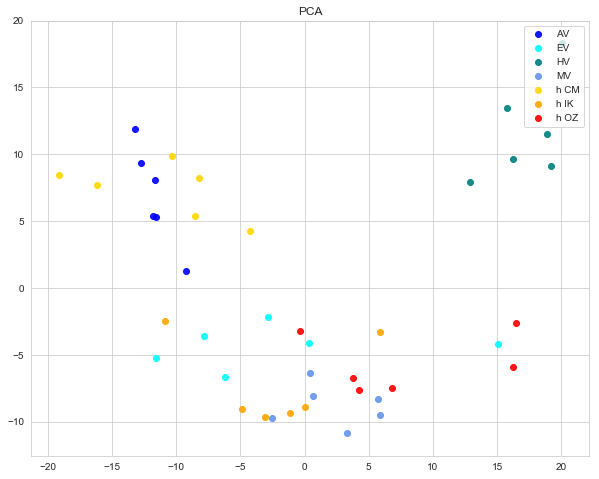

In [90]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
colors={"AV":'blue', 
       "EV":'cyan', 
       "HV": 'teal',
       "MV": "cornflowerblue",
       "h CM": "gold",
       "h IK": "orange",
       "h OZ": 'red'}


PCA_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
# X = df.groupby(by=['column','row']).agg(['mean']).dropna(axis=1)
X = df.drop(['index'], axis=1).groupby(by=['column','row']).agg(['mean']).fillna(-1)


#_____________________________________________
# Removing Nucli and Cyto features for testing
#_____________________________________________
# X.drop('h2', inplace=True)
# X.drop(df.columns[df.columns.str.contains('Cyto')],axis=1, inplace=True)
# X.drop(df.columns[df.columns.str.contains('Nucli')],axis=1, inplace=True)

#_____________________________________________

for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')

X_pc = PCA_pipeline.fit_transform(X)
fig, ax = plt.subplots()

ind = 0
for g in df.column.unique():
    inc = X.loc[g, :].shape[0]
    ax.scatter(X_pc[ind:ind+inc, 0], X_pc[ind:ind+inc, 1], c=colors[X.index[ind][0]], alpha=0.9, label=X.index[ind][0])
    ind = ind + inc
    


ax.legend(loc='upper right')
ax.set_title("PCA")
ax.figure.set_size_inches((10,8))
plt.show()

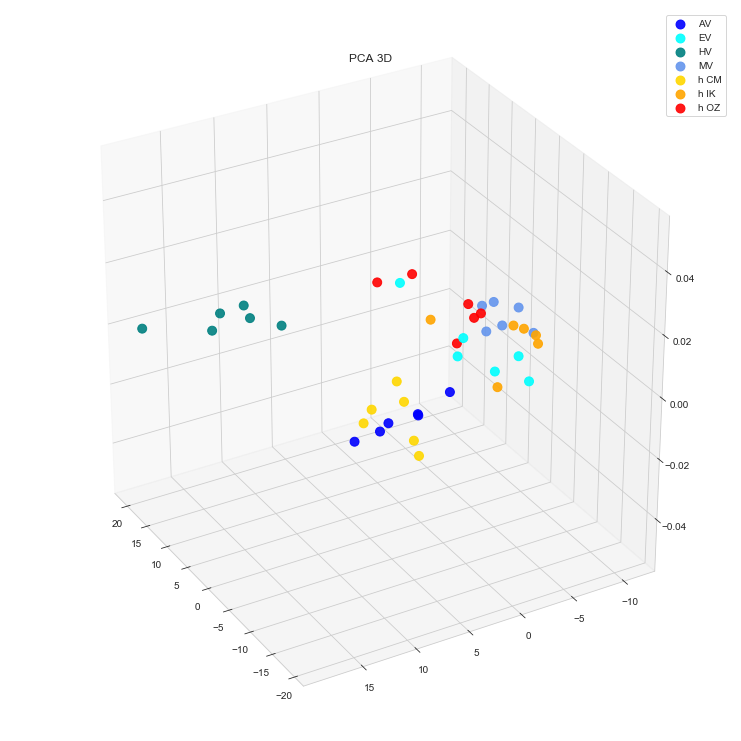

In [77]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

PCA_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])
X = df.groupby(by=['column','row']).agg(['mean']).fillna(0)

for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')

X_pc = PCA_pipeline.fit_transform(X)

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, elev=30, azim=150)

ind = 0
for g in df.column.unique():
    inc = X.loc[g, :].shape[0]
    ax.scatter(X_pc[ind:ind+inc, 0], X_pc[ind:ind+inc, 1], c=colors[X.index[ind][0]], alpha=0.9, label=X.index[ind][0], s=80)
    ind = ind + inc
    
ax.legend(loc='upper right')
ax.set_title("PCA 3D")
ax.figure.set_size_inches((10,10))
plt.show()

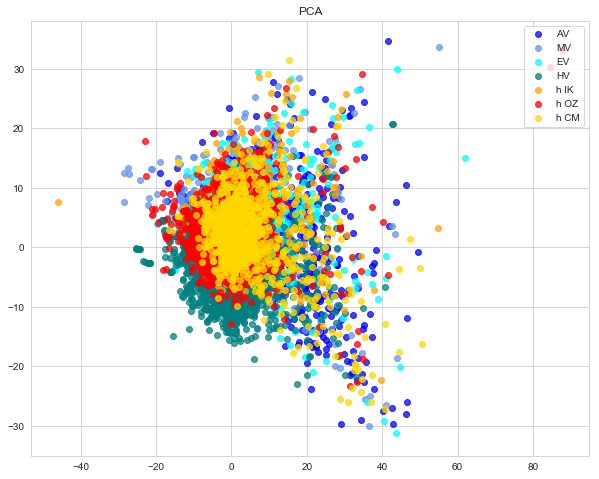

In [102]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
colors={"AV":'blue', 
       "EV":'cyan', 
       "HV": 'teal',
       "MV": "cornflowerblue",
       "h CM": "gold",
       "h IK": "orange",
       "h OZ": 'red'}


PCA_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
# X = df.groupby(by=['column','row']).agg(['mean']).dropna(axis=1)
# X = df.groupby(by=['column','row']).agg(['mean']).fillna(-1)
X = df.drop(['index'], axis=1)




#_____________________________________________
# Removing Nucli and Cyto features for testing
#_____________________________________________
# X.drop('h2', inplace=True)
# X.drop(df.columns[df.columns.str.contains('Cyto')],axis=1, inplace=True)
# X.drop(df.columns[df.columns.str.contains('Nucli')],axis=1, inplace=True)

#_____________________________________________

for f in X.columns[X.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')

X_pc = PCA_pipeline.fit_transform(X.drop(['column'], axis=1))
fig, ax = plt.subplots()

for g in df.column.unique():
    ax.scatter(X_pc[X.column==g, 0], X_pc[X.column==g, 1], c=colors[g], alpha=0.75, label=g)
    


ax.legend(loc='upper right')
ax.set_title("PCA")
ax.figure.set_size_inches((10,8))
plt.show()

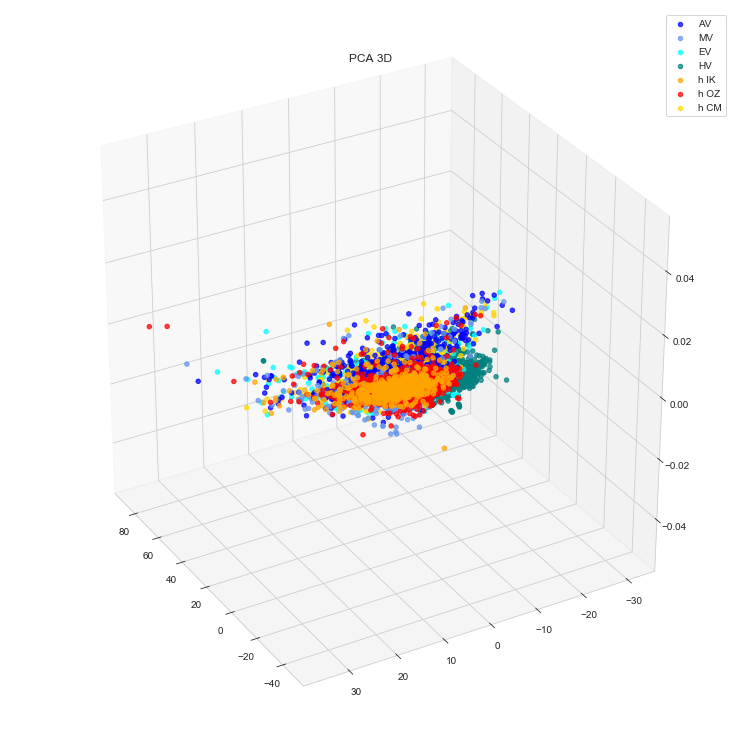

In [103]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

PCA_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])
X = df.drop(['index'], axis=1)

for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')

X_pc = PCA_pipeline.fit_transform(X.drop(['column'], axis=1))

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, elev=30, azim=150)

ind = 0
for g in df.column.unique():
    ax.scatter(X_pc[X.column==g, 0], X_pc[X.column==g, 1], c=colors[g], alpha=0.75, label=g)
    
ax.legend(loc='upper right')
ax.set_title("PCA 3D")
ax.figure.set_size_inches((10,10))
plt.show()

Lrt's try to take HV out of the poplulation

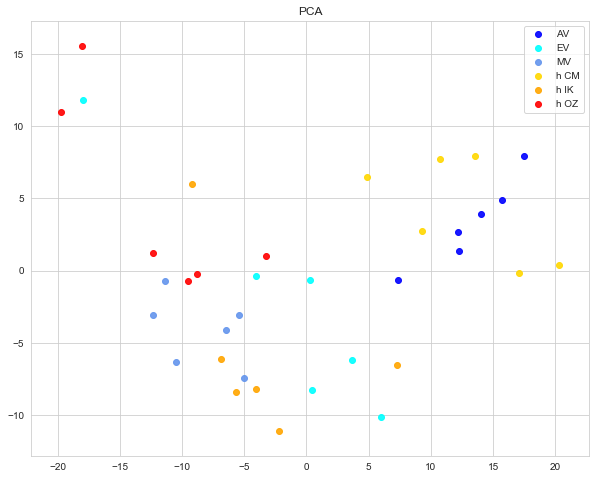

In [30]:
X = df.groupby(by=['column','row']).agg(['mean']).fillna(-1)


#_____________________________________________
# Removing HV
#_____________________________________________
X.drop('HV', level='column', inplace=True)
#_____________________________________________

for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')

X_pc = PCA_pipeline.fit_transform(X)
fig, ax = plt.subplots()

ind = 0
for g in X.index.get_level_values(0).unique():
    inc = X.loc[g, :].shape[0]
    ax.scatter(X_pc[ind:ind+inc, 0], X_pc[ind:ind+inc, 1], c=colors[X.index[ind][0]], alpha=0.9, label=X.index[ind][0])
    ind = ind + inc
    


ax.legend(loc='upper right')
ax.set_title("PCA")
ax.figure.set_size_inches((10,8))
plt.show()

Let's try to use Random Foreset to find features importance and do a PCA on selected features

In [31]:
X = df.copy().dropna()
y = X.column
y = pd.get_dummies(y)
for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')
X.drop('column', axis=1, inplace=True, errors='ignore')
X.drop('index', axis=1, inplace=True, errors='ignore')
X.drop('nucli_label', axis=1, inplace=True, errors='ignore')
X.drop('cyto_label', axis=1, inplace=True, errors='ignore')


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth = 4)
clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature ranking:
1. feature Cyto_solidity (0.057844)
2. feature TMRE_solidity_mean (0.052039)
3. feature TMRE_extent_mean (0.046492)
4. feature Cyto_std (0.046454)
5. feature Cyto_q90 (0.041369)
6. feature TMRE_solidity_median (0.034741)
7. feature TMRE_solidity_q90 (0.034633)
8. feature TMRE_avg_median (0.034433)
9. feature TMRE_extent_median (0.030517)
10. feature MitoTracker_rect_area_mean (0.027454)
11. feature MitoTracker_min_enclosing_circle_area_mean (0.026106)
12. feature Cyto_min_enclosing_circle_area (0.025063)
13. feature Cyto_avg (0.024953)
14. feature TMRE_q90_median (0.024816)
15. feature MitoTracker_min_enclosing_circle_area_std (0.021655)
16. feature TMRE_std_median (0.020767)
17. feature Cyto_circularity_size_ratio (0.018294)
18. feature TMRE_q50_median (0.018174)
19. feature TMRE_extent_q90 (0.017434)
20. feature TMRE_max_median (0.017242)
21. feature MitoTracker_min_enclosing_circle_area_sum (0.016907)
22. feature MitoTracker_rect_area_std (0.014557)
23. feature Cyto

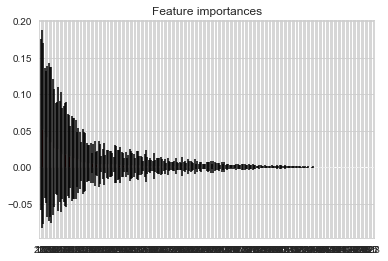

In [33]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(100):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

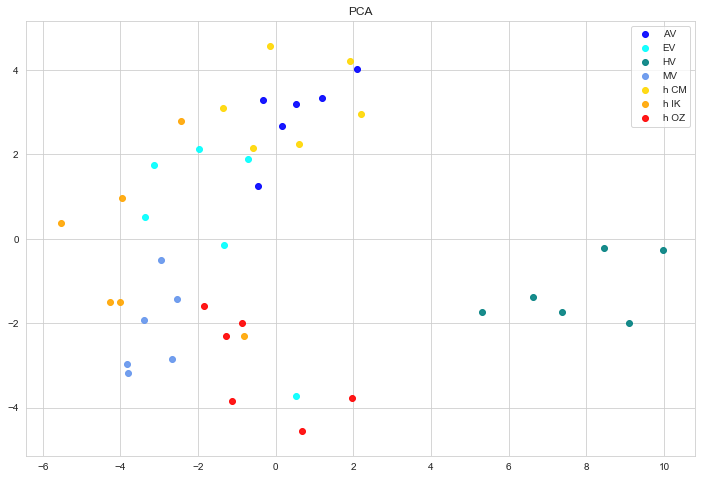

In [34]:
PCA_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
X = df.groupby(by=['column','row']).agg(['mean']).fillna(0)
X=X[X.columns[indices[:25]]]

for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')


PCA_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])

for f in df.columns[df.dtypes=='category']:
    X.drop(f, axis=1, inplace=True, errors='ignore')

X_pc = PCA_pipeline.fit_transform(X)
fig, ax = plt.subplots()

ind = 0
for g in df.column.unique():
    inc = X.loc[g, :].shape[0]
    ax.scatter(X_pc[ind:ind+inc, 0], X_pc[ind:ind+inc, 1], c=colors[X.index[ind][0]], alpha=0.9, label=X.index[ind][0])
    ind = ind + inc
    
ax.legend(loc='upper right')
ax.set_title("PCA")
ax.figure.set_size_inches((12,8))
plt.show()    
    
